# 扔骰子

### 本文以扔骰子为例，通过模拟验证了多次独立随机试验后，骰子点数的总和服从正态分布。
### 一枚正常骰子掷一万次，并将每次投掷的结果相加得到总和。将上述实验进行多次重复，从理论上我们可证明，总和的均值为35000，标准差为$100·\sqrt{\frac{35}{12}} \approx 170.78$

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.mlab as mlab
import datetime
from collections import defaultdict
import scipy.stats as stats
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
# N为总模拟次数
N = 10000
# Nround为每次模拟掷骰子的次数
Nround = 10000
# 通过随机函数模拟掷骰子的过程,result_list保存每次模拟点数总和
result_list = []
for i in range(N):
    # count保存每次模拟点数总和
    count = 0
    # 生成Nround个1~6个随机数,代表骰子点数
    # Tips: 这里推荐使用向量化操作，可显著提高程序运行速度
    count += np.random.randint(1, 7, size=Nround).sum()
    result_list.append(count)

In [3]:
# 计算总和的统计量
avgRet = np.mean(result_list)
medianRet = np.median(result_list)
stdRet = np.std(result_list)
skewRet = stats.skew(result_list)
kurtRet = stats.kurtosis(result_list)
print(
"""
每次模拟点数总和的平均数 : %.2f
每次模拟点数总和的中位数 : %.2f
每次模拟点数总和的标准差 : %.2f
每次模拟点数总和的偏度   : %.2f
每次模拟点数总和的峰度   : %.2f
""" %(avgRet, medianRet, stdRet, skewRet, kurtRet)
)


每次模拟点数总和的平均数 : 35001.23
每次模拟点数总和的中位数 : 35000.00
每次模拟点数总和的标准差 : 170.00
每次模拟点数总和的偏度   : 0.05
每次模拟点数总和的峰度   : -0.01



In [4]:
# 超过1倍standard deviation的次数
count_1 = np.sum(np.array(result_list) > avgRet + stdRet * 1.0) + np.sum(np.array(result_list) < avgRet - stdRet * 1.0)
ratio_1 = 1.0 * count_1/N

# 超过2倍standard deviation的次数
count_2 = np.sum(np.array(result_list) > avgRet + stdRet * 2.0) + np.sum(np.array(result_list) < avgRet - stdRet * 2.0)
ratio_2 = 1.0 * count_2/N

# 超过3倍standard deviation的次数
count_3 = np.sum(np.array(result_list) > avgRet + stdRet * 3.0) + np.sum(np.array(result_list) < avgRet - stdRet * 3.0)
ratio_3 = 1.0 * count_3/N

print('超过1倍standard deviation的次数: %d, 占比为: %.3f' %(count_1, ratio_1))
print('超过2倍standard deviation的次数: %d, 占比为: %.3f' %(count_2, ratio_2))
print('超过3倍standard deviation的次数: %d, 占比为: %.3f' %(count_3, ratio_3))

超过1倍standard deviation的次数: 3130, 占比为: 0.313
超过2倍standard deviation的次数: 469, 占比为: 0.047
超过3倍standard deviation的次数: 31, 占比为: 0.003


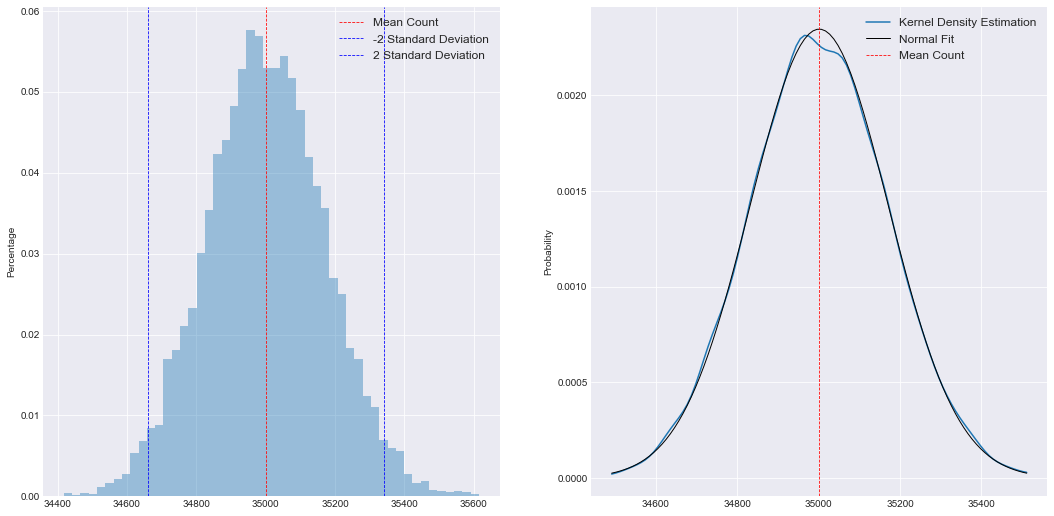

In [5]:
# 画日对数收益率分布直方图
fig = plt.figure(figsize=(18, 9))
v = result_list
x = np.linspace(avgRet - 3*stdRet, avgRet + 3*stdRet, 100)
y = mlab.normpdf(x, avgRet, stdRet)
kde = stats.gaussian_kde(v)

# plot the histogram
plt.subplot(121)
plt.hist(v, 50, weights = np.ones(len(v))/len(v), alpha = 0.4)
plt.axvline(x = avgRet, color = 'red', linestyle = '--', linewidth = 0.8, label = 'Mean Count')
plt.axvline(x = avgRet - 2 * stdRet, color = 'blue', linestyle = '--', linewidth = 0.8, label = '-2 Standard Deviation')
plt.axvline(x = avgRet + 2 * stdRet, color = 'blue', linestyle = '--', linewidth = 0.8, label = '2 Standard Deviation')
plt.ylabel('Percentage', fontsize = 10)
plt.legend(fontsize = 12)

# plot the kde and normal fit
plt.subplot(122)
plt.plot(x, kde(x), label = 'Kernel Density Estimation')
plt.plot(x, y, color = 'black', linewidth=1, label = 'Normal Fit')
plt.ylabel('Probability', fontsize = 10)
plt.axvline(x = avgRet, color = 'red', linestyle = '--', linewidth = 0.8, label = 'Mean Count')
plt.legend(fontsize = 12)